In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import datetime
import math

In [2]:
rsv = pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
rsv.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [4]:
fn = rsv.authors.unique()
thresh = 0
writers = dict()
for f in fn:
    fc = rsv[rsv.authors == f].bookID.count() 
    if fc >= thresh: 
        writers[f] = fc

In [5]:
writers = dict(sorted(writers.items(), key=lambda item: item[1], reverse=True)[:10])

## Simple Counting of writers
Thus obtained graph is shown as follows
showing that P.G. Woodhouse and Stephen King are equally dominating

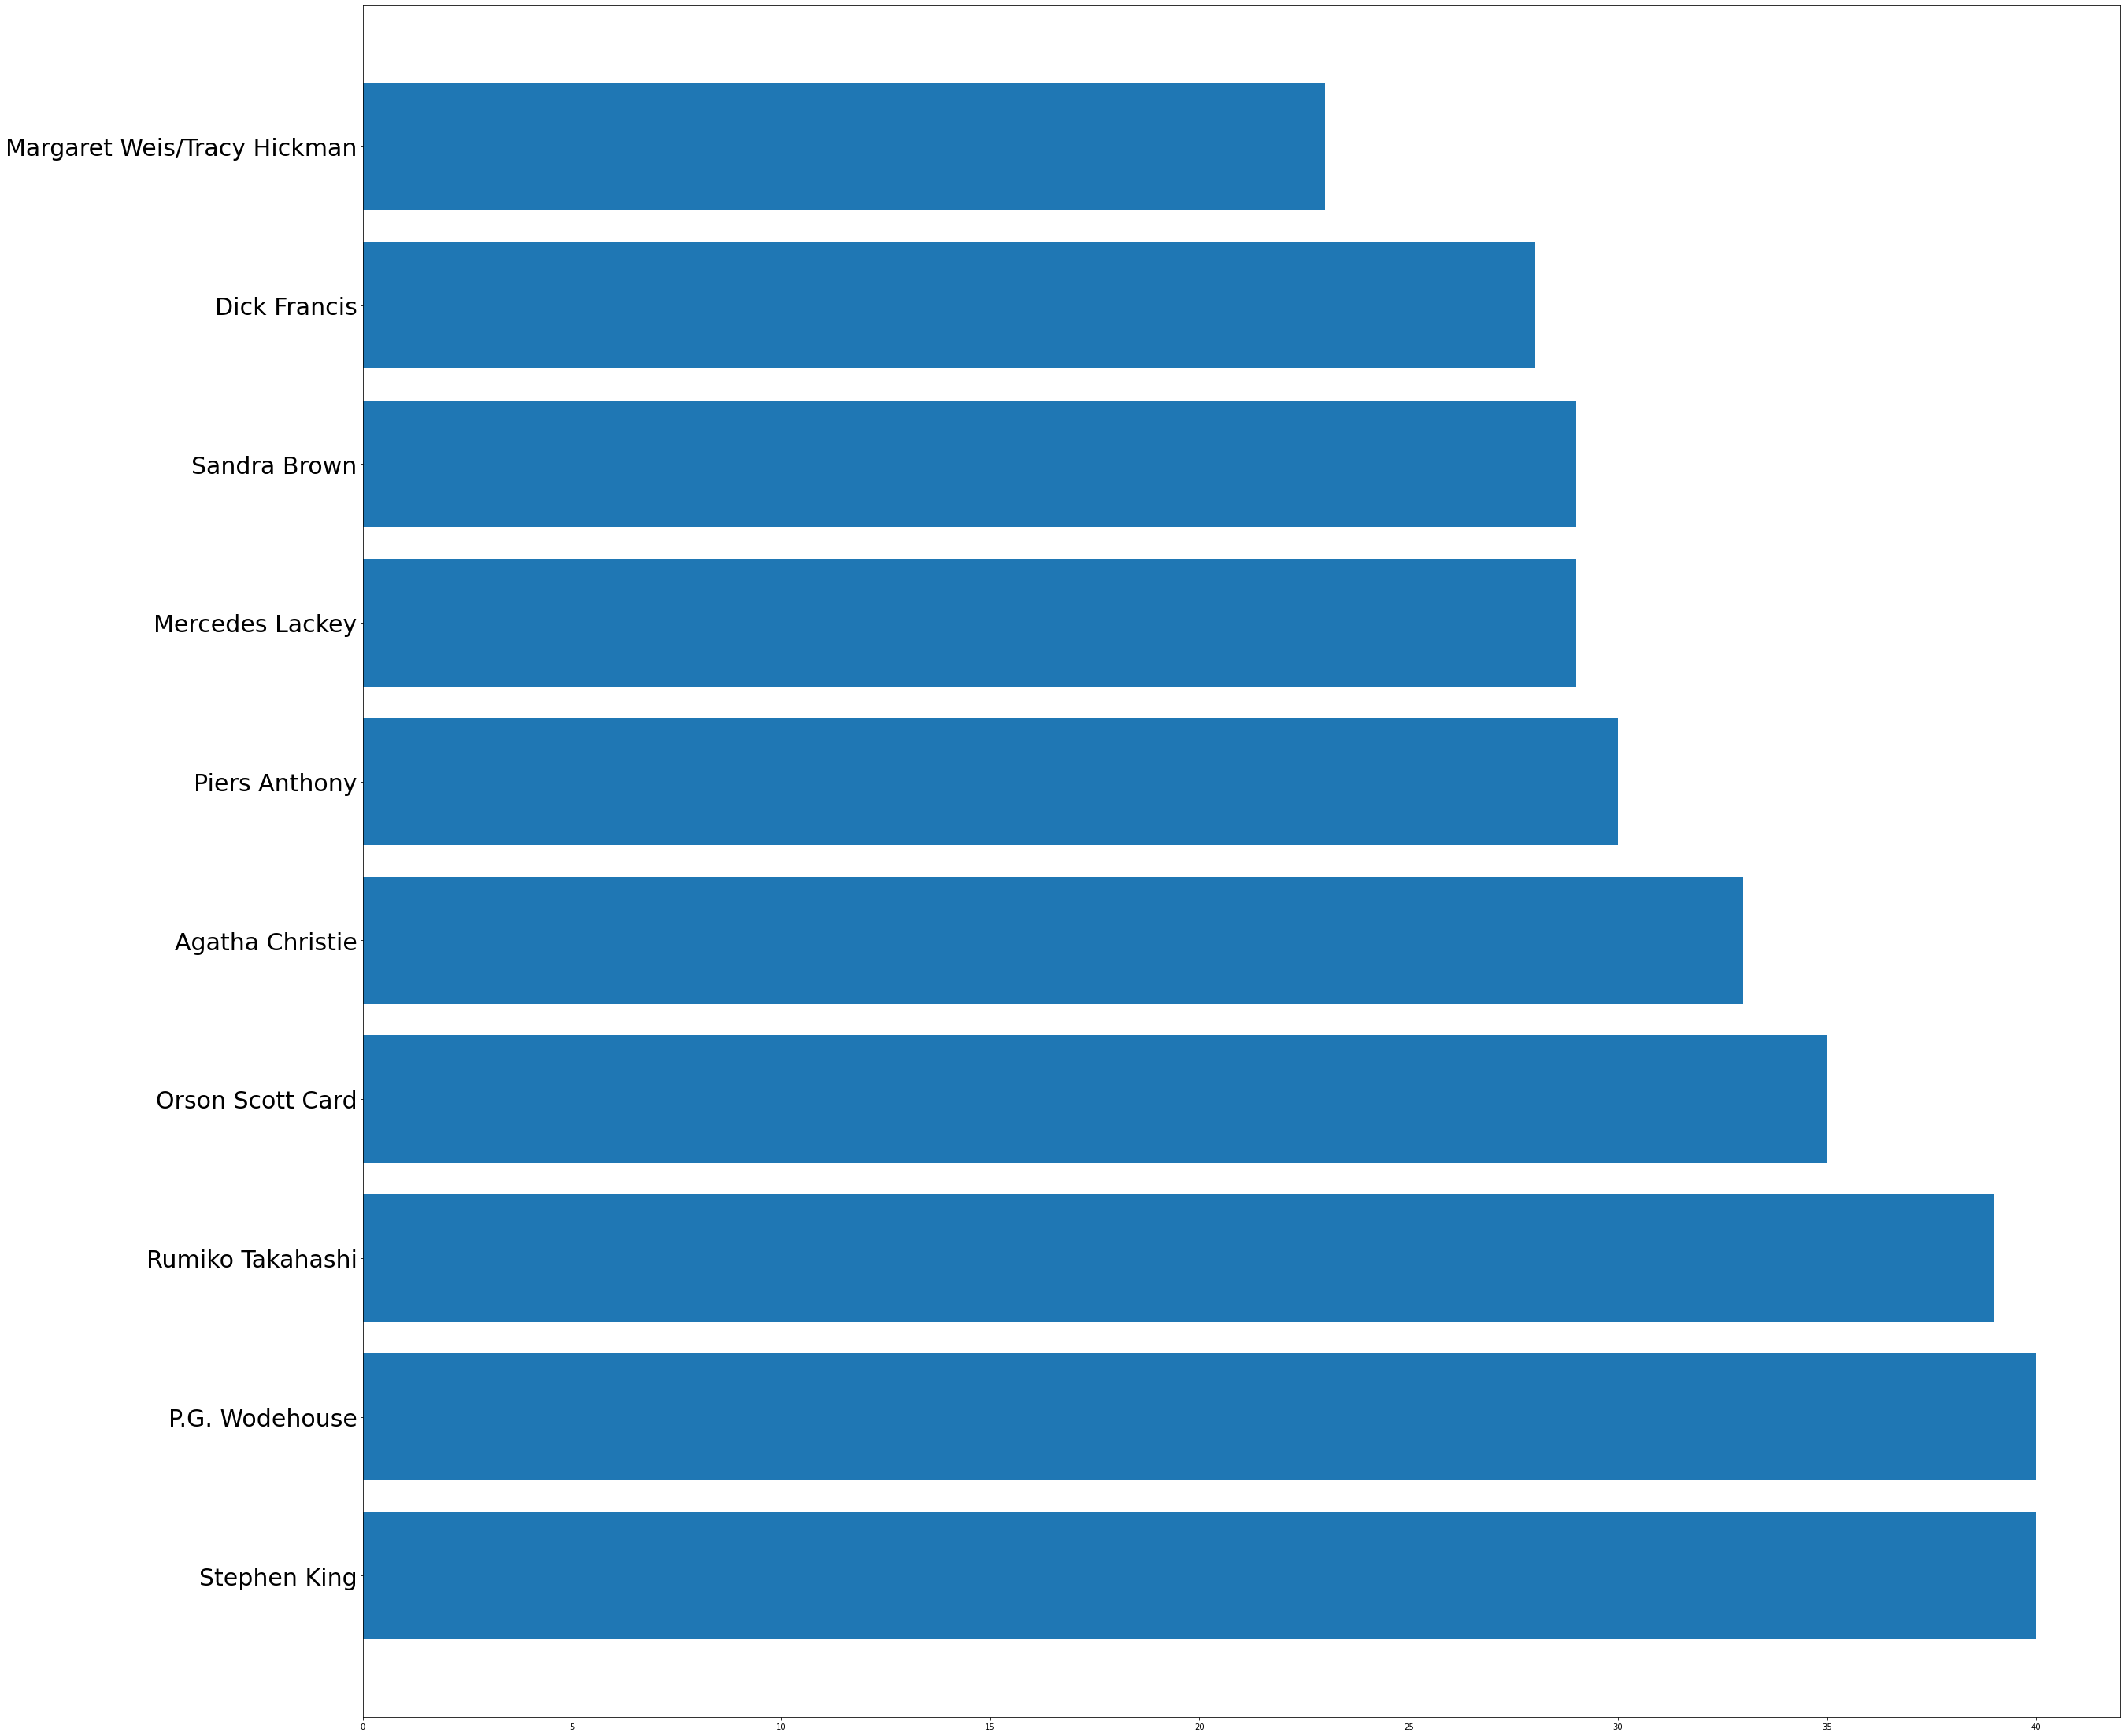

In [6]:
plt.figure(figsize=(40, 40))
plt.barh(range(len(writers)), list(writers.values()), align='center')
plt.yticks(range(len(writers)), list(writers.keys()), fontsize=30)
plt.show();

# Question mark 
ON the Authors columns, Clearly multiple authors are seprated by a "/" which is "incorrect" for direct
data analysis. So after figuring out a "function" which does the following:->
* It looks for '/' in the authors
* Seprates them if normally acessed
* But if the book is already seen, maximum number of writers are considered
* Hence we find that actual count was incorrect
* Also includes single writers


In [7]:
title_arr = []
writers_arr = []
single_writer = []
for f in fn:
    if '/' in f:
        try:
            book = rsv[rsv.authors == f].title.values[0]
            if book in title_arr:
                if len(writers_arr[title_arr.index(book)]) < len(f.split('/')):
                    writers_arr[title_arr.index(book)] = f.split('/')
            else:
                title_arr.append(book)
                writers_arr.append(f.split('/'))
        except IndexError:
            title_arr.append(rsv[rsv.authors == f].title.values[0])
            writers_arr.append(f.split('/'))

In [8]:
len(title_arr)

3563

In [9]:
len(set(title_arr))

3563

In [10]:
unique_writes = set()
count = 0
max_len = 0
for x,y  in zip(title_arr, writers_arr):
    if len(y) > max_len:
        max_len = len(y)
    for z in y:
        unique_writes.add(z)
        count+=1

In [11]:
for k in writers.keys():
    if '/' not in k:
        unique_writes.add(k)
        count+=1

## Comparing the unique writers
* We can see there are 7123 unique writers among 10464
* Thus giving us a way to categorize

In [12]:
len(unique_writes)

7123

In [13]:
count

10464

In [14]:
get_books = dict.fromkeys(unique_writes, 0)

In [15]:
for x,y in zip(title_arr, writers_arr):
    for z in y:
        get_books[z]+=1

In [16]:
for x in writers.items():
    if '/' not in x[0]:
        get_books[x[0]]+=x[1]

## Looking into Titles
We find that twilight has maximum reviews and rating of 3.59
Although max rating among top 10 is of Harry Potter and Half blood Prince

In [17]:
rsv.sort_values(by=['ratings_count'],
                ascending=False).loc[:,("title","average_rating")][:10]

,title,average_rating
10336,Twilight (Twilight #1),3.59
1697,The Hobbit or There and Back Again,4.27
1462,The Catcher in the Rye,3.80
307,Angels & Demons (Robert Langdon #1),3.89
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56
4415,Harry Potter and the Chamber of Secrets (Harry...,4.42
1,Harry Potter and the Order of the Phoenix (Har...,4.49
23,The Fellowship of the Ring (The Lord of the Ri...,4.36
2114,Animal Farm,3.93
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57


In [18]:
get_books = dict(sorted(get_books.items(), key=lambda item: item[1], reverse=True))

## The correct visualization
The visualization is perfect as everything is taken into account, hence Seeing Stephen King as a dominant

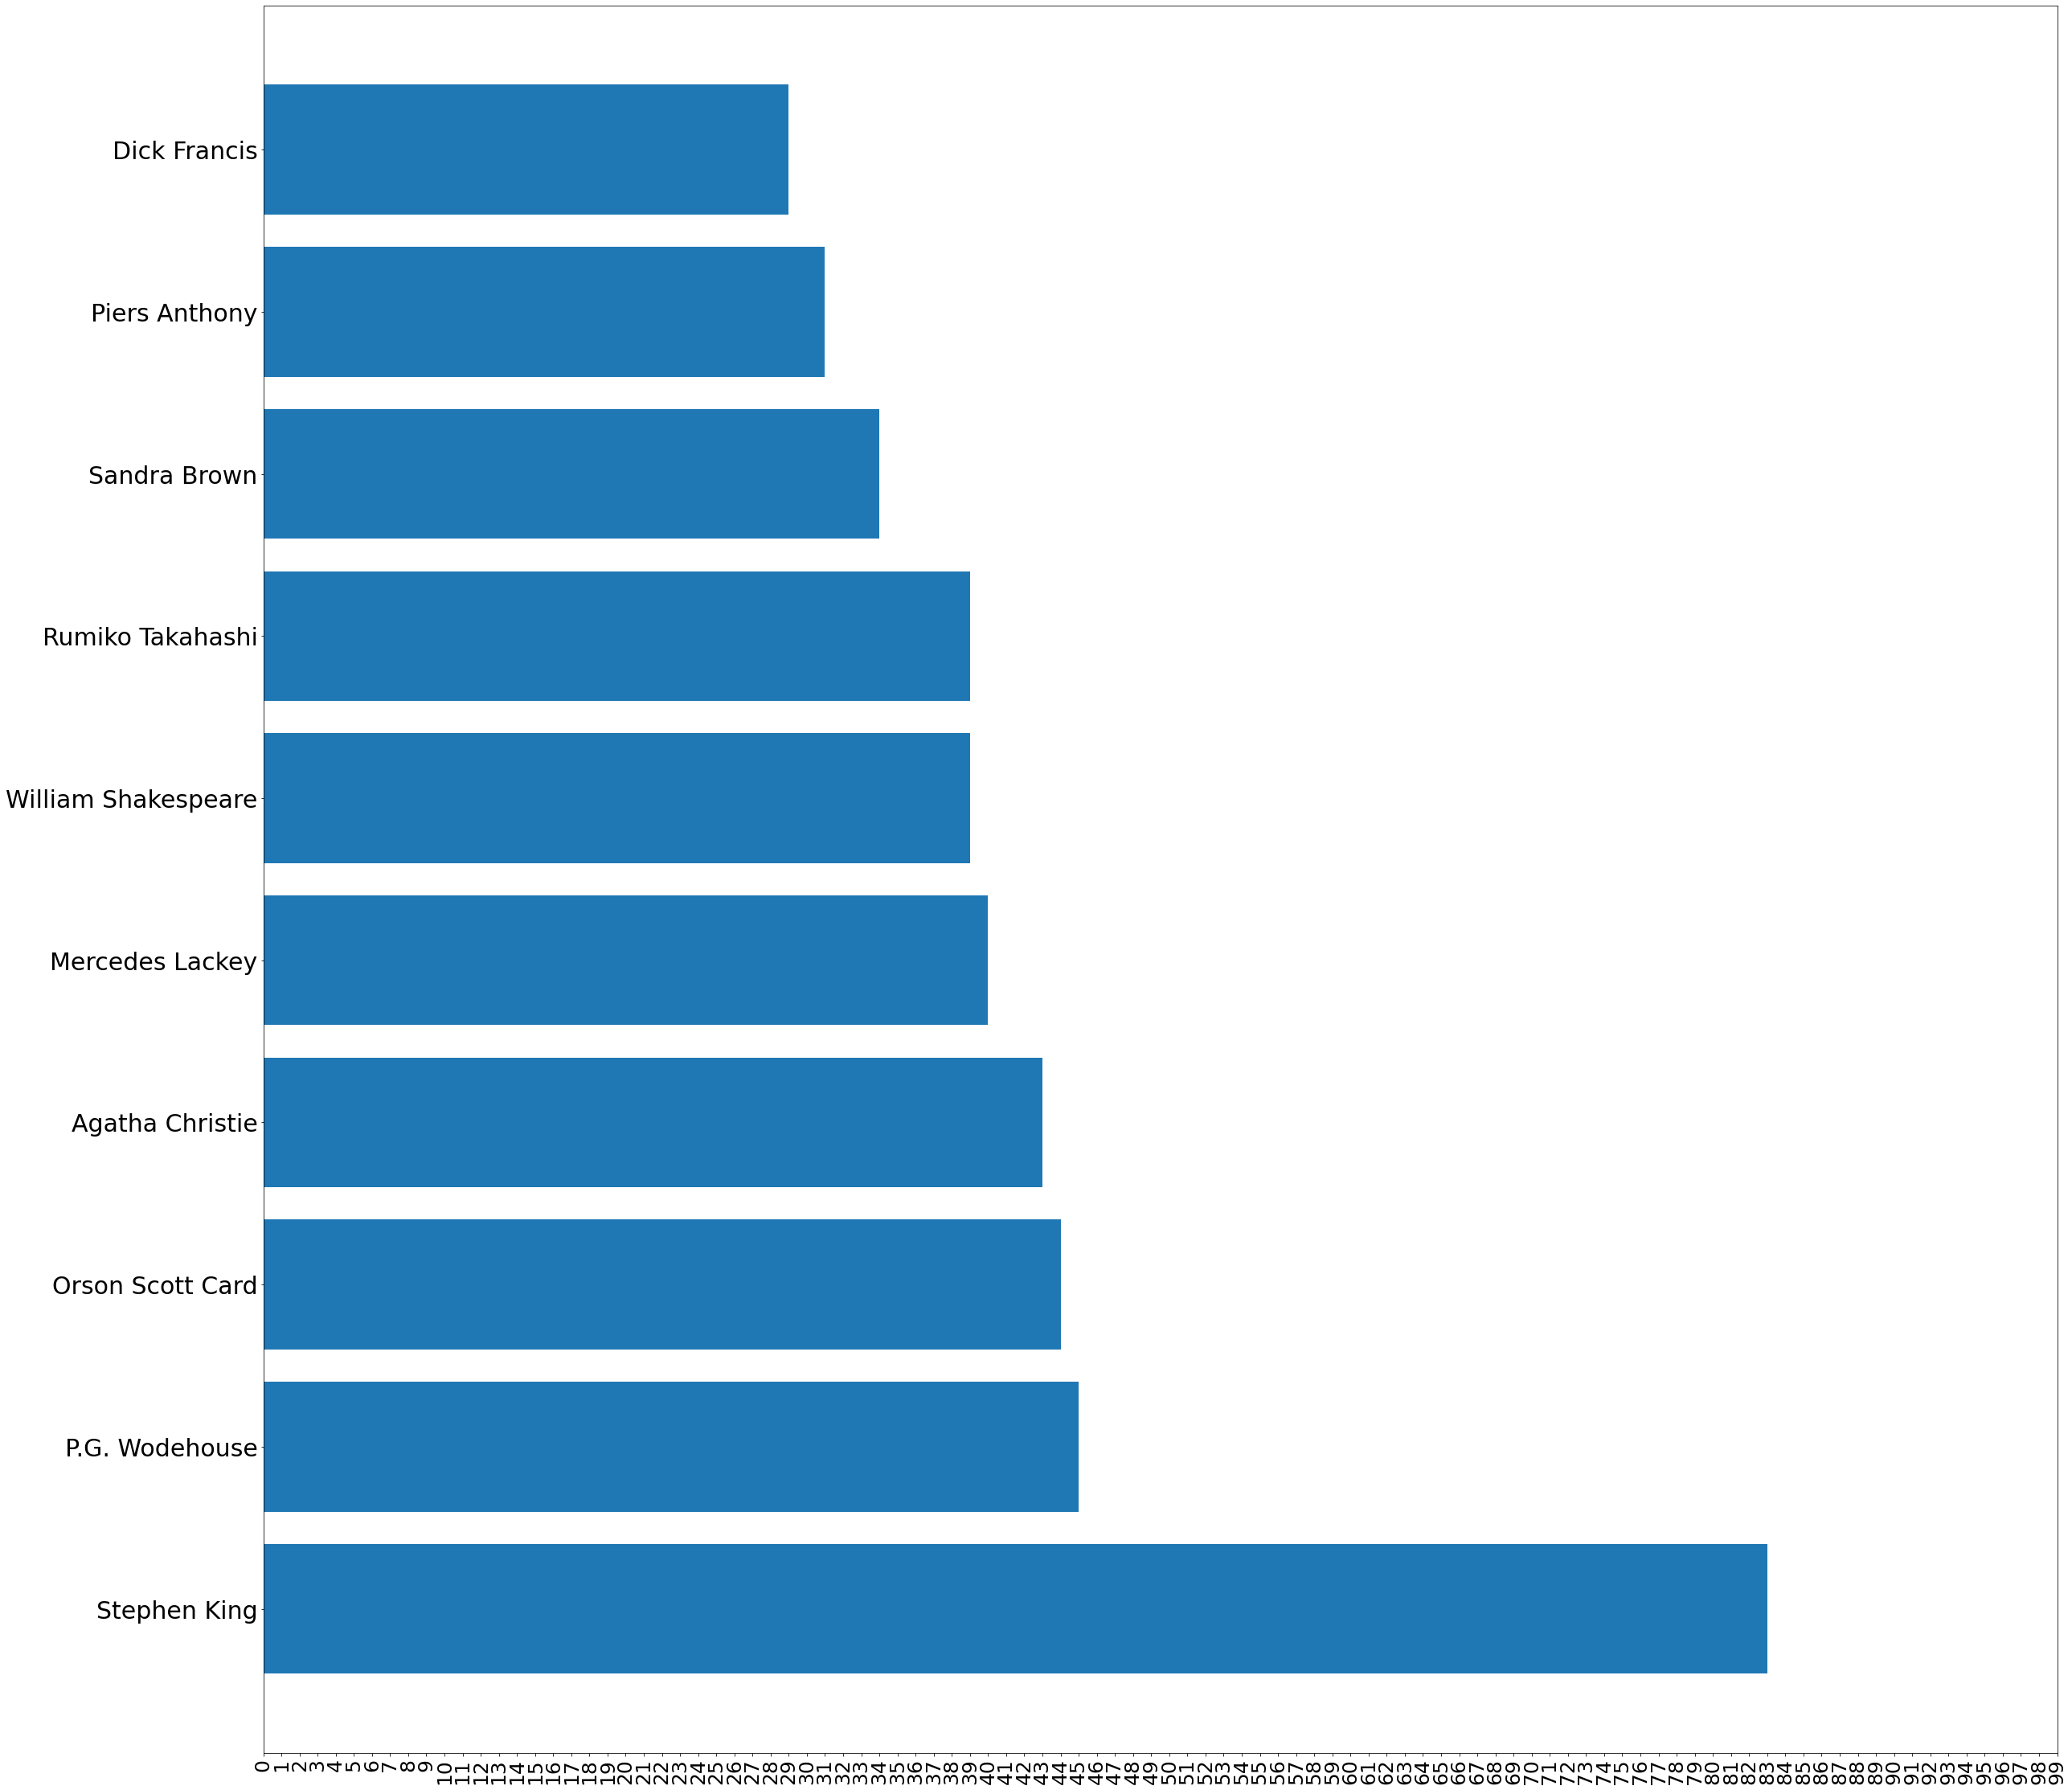

In [19]:
plt.figure(figsize=(40, 40));
plt.barh(range(10), list(get_books.values())[:10], align='center')
plt.yticks(range(10), list(get_books.keys())[:10], fontsize=30)
plt.xticks(range(100), range(100), fontsize=25, rotation=90)
plt.show();

In [20]:
dates = []
for x in rsv.publication_date.values:
    try:
        dates.append(pd.to_datetime(datetime.datetime.strptime(x,"%m/%d/%Y")))
    except:
        dates.append(pd.to_datetime(datetime.datetime.now()))

In [21]:
rsv["New dates"] = dates

## Incorrect dates
As you can see only 2 dates are incorrect in the dateset which can effect the anaylsis

In [22]:
rsv.sort_values(by='New dates',ascending=False).loc[:,("title","New dates")]

,title,New dates
11094,Montaillou village occitan de 1294 à 1324,2021-12-19 01:55:31.851249
8177,In Pursuit of the Proper Sinner (Inspector Lyn...,2021-12-19 01:55:31.124684
9664,A Quick Bite (Argeneau #1),2020-03-31 00:00:00.000000
10335,American Genesis: Captain John Smith and the F...,2019-08-17 00:00:00.000000
3981,The Art of Loving,2019-08-06 00:00:00.000000
...,...,...
7141,The Library 1 Books 1-3.9,1921-01-01 00:00:00.000000
435,History of the Peloponnesian War: Bk. 1-2,1919-01-01 00:00:00.000000
6816,Agricola / Germania / Dialogue on Oratory,1914-01-01 00:00:00.000000
6488,On Duties (De Officiis),1913-01-01 00:00:00.000000


In [23]:
rsv["Rating_Interval"] = pd.DataFrame(pd.cut(rsv.average_rating, 5, [0.0,1.0,2.0,3.0,4.0,5.0]))

In [24]:
ratings = dict()
for i in range(0,5,1):
    ratings[str(i)+" to "+str(i+1)] = (rsv["Rating_Interval"] == pd.Interval(left = float(i), right = float(i+1))).sum()

In [25]:
del ratings['0 to 1']

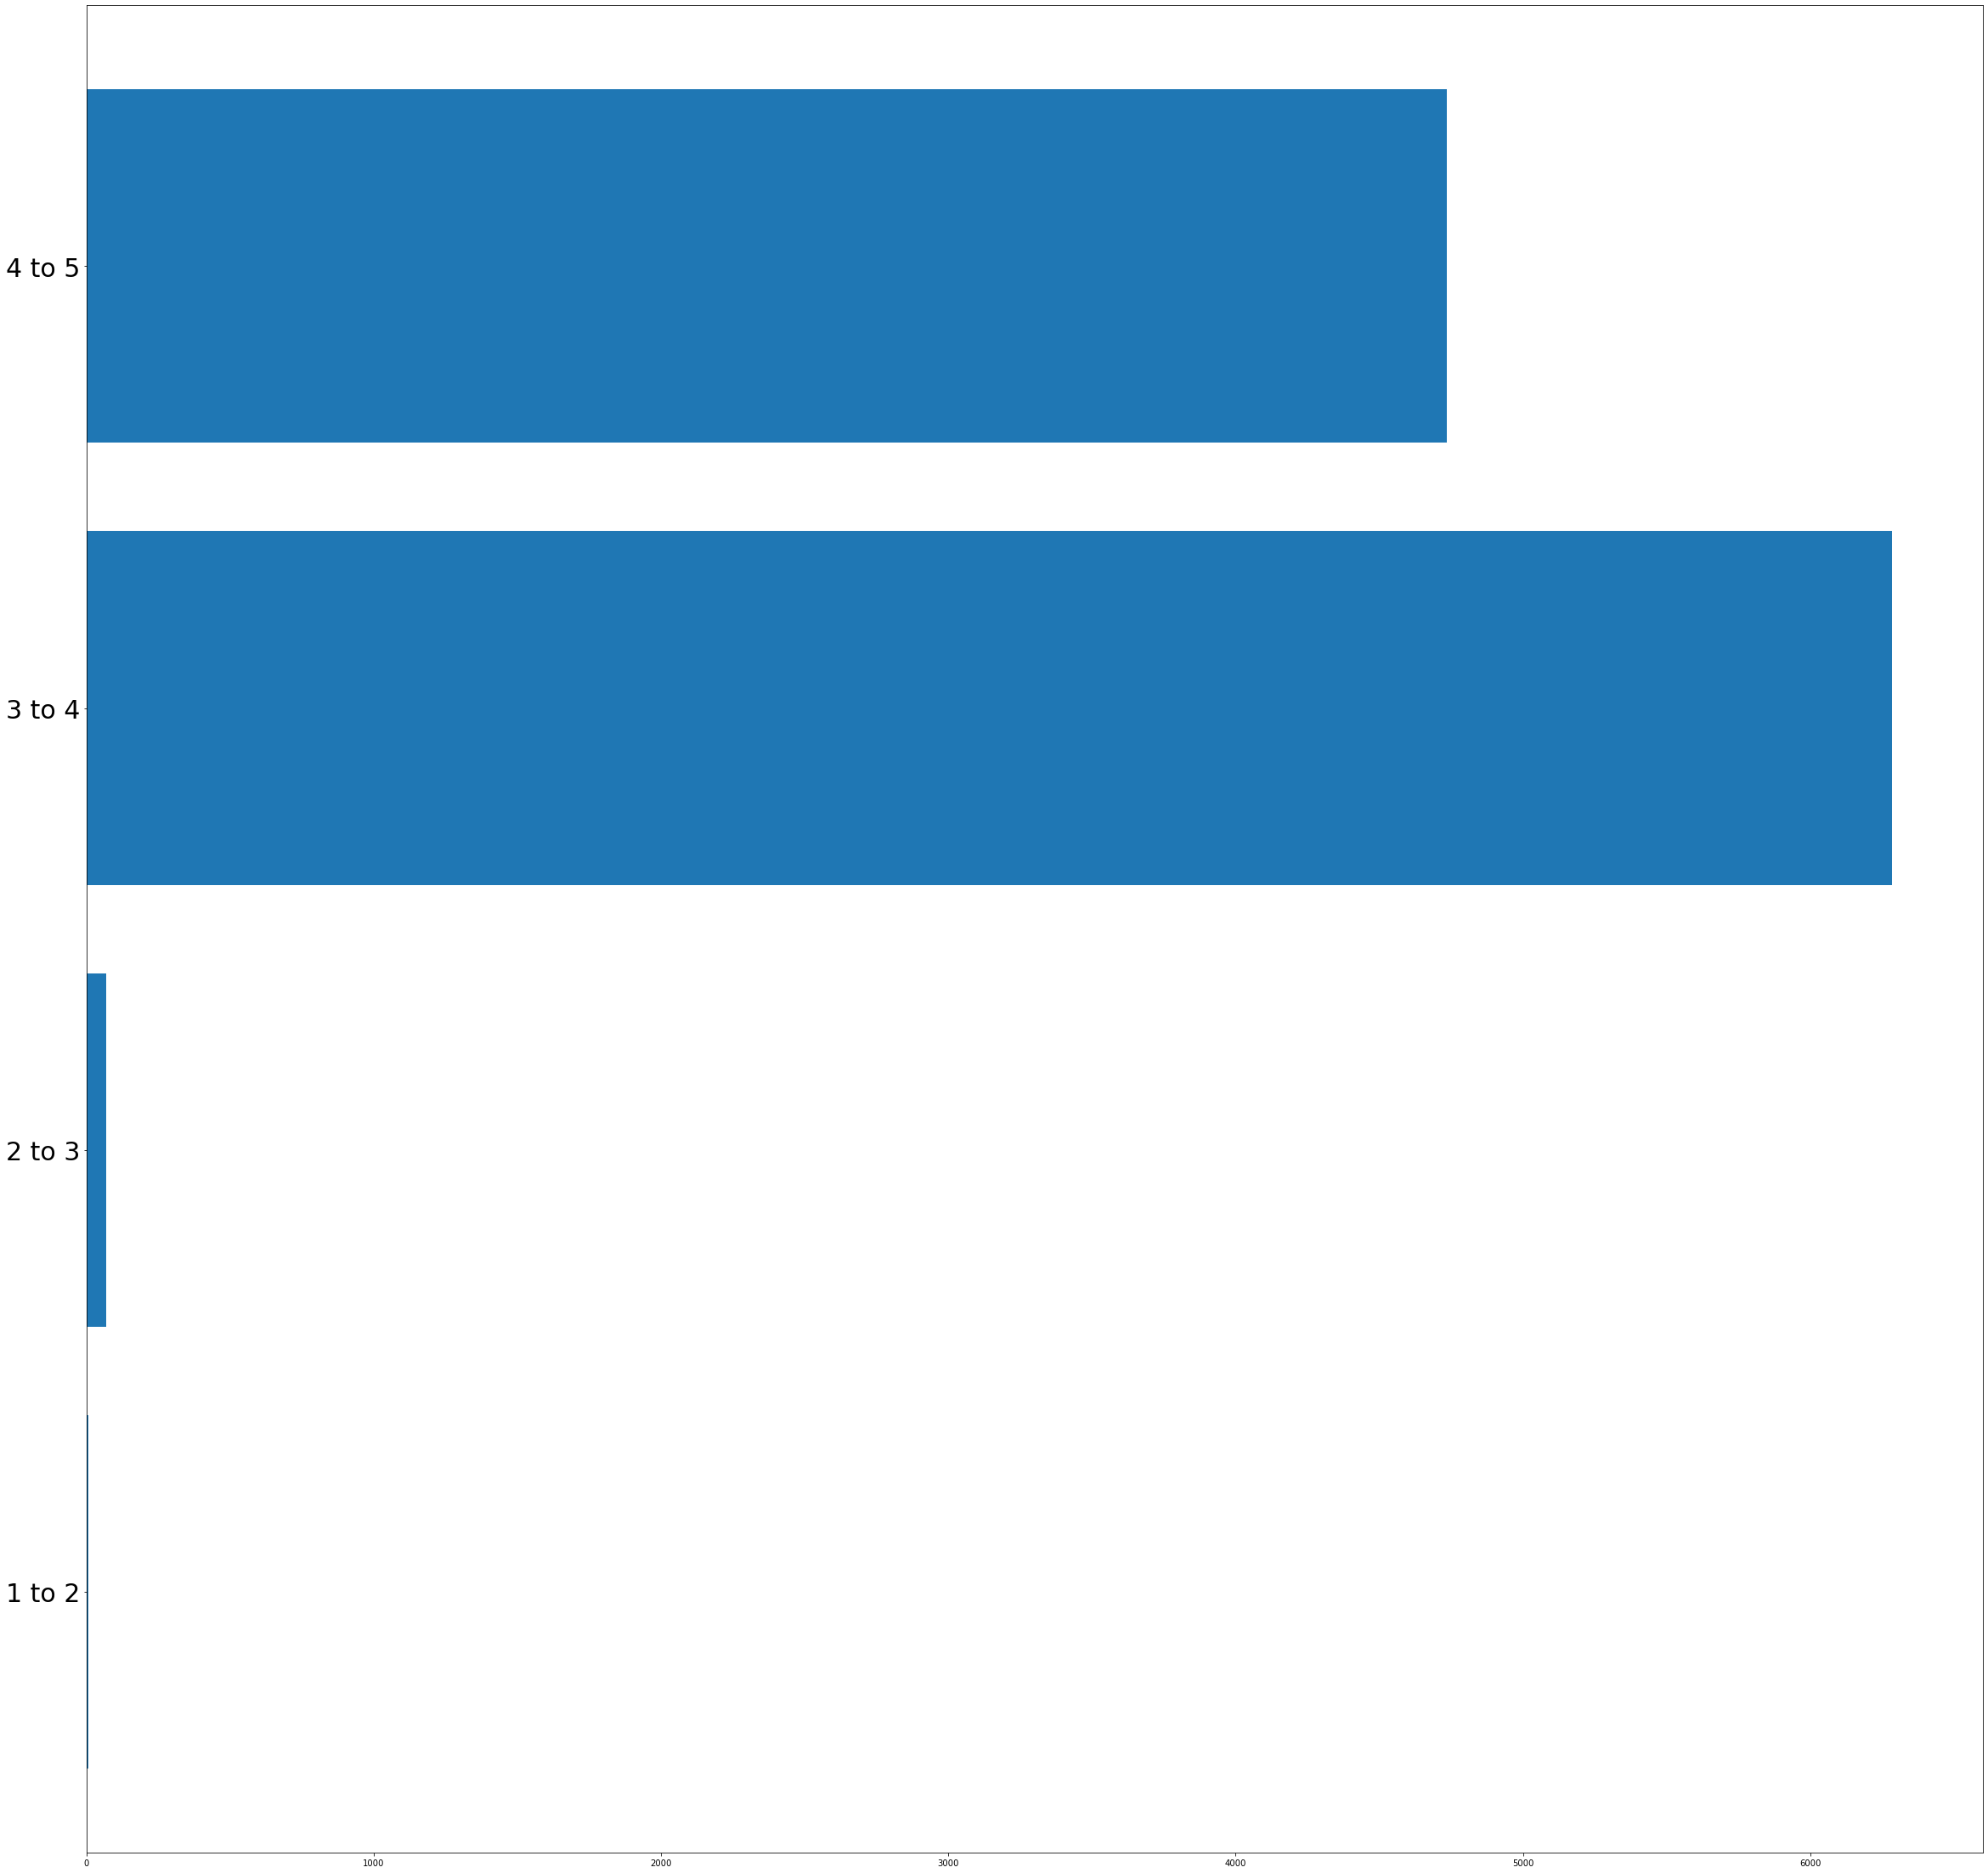

In [26]:
plt.figure(figsize=(40, 40));
plt.barh(range(len(ratings)), list(ratings.values()), align='center')
plt.yticks(range(len(ratings)), list(ratings.keys()), fontsize=30)
# plt.yticks(range(50), range(50), fontsize=30)
plt.show();

## Ratings
From the above graph we can clearly see that the dominating rating is
3 to 4, moreover the average lies between 3 to 4.
This is skewed data, as well an indication that the 
dataset given has more 3 to 5 star books within the sample

In [27]:
lang = dict()

In [28]:
rsv.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [29]:
lang["eng"] = 0

In [30]:
skip = ["eng","en-US","en-CA","en-GB"]

In [31]:
unq_lang = rsv.language_code.unique()

In [32]:
for x in unq_lang:
    if x not in skip:
        lang[x] = rsv[rsv.language_code == x].bookID.count()
    if x in skip:
        lang["eng"]+=rsv[rsv.language_code == x].bookID.count()

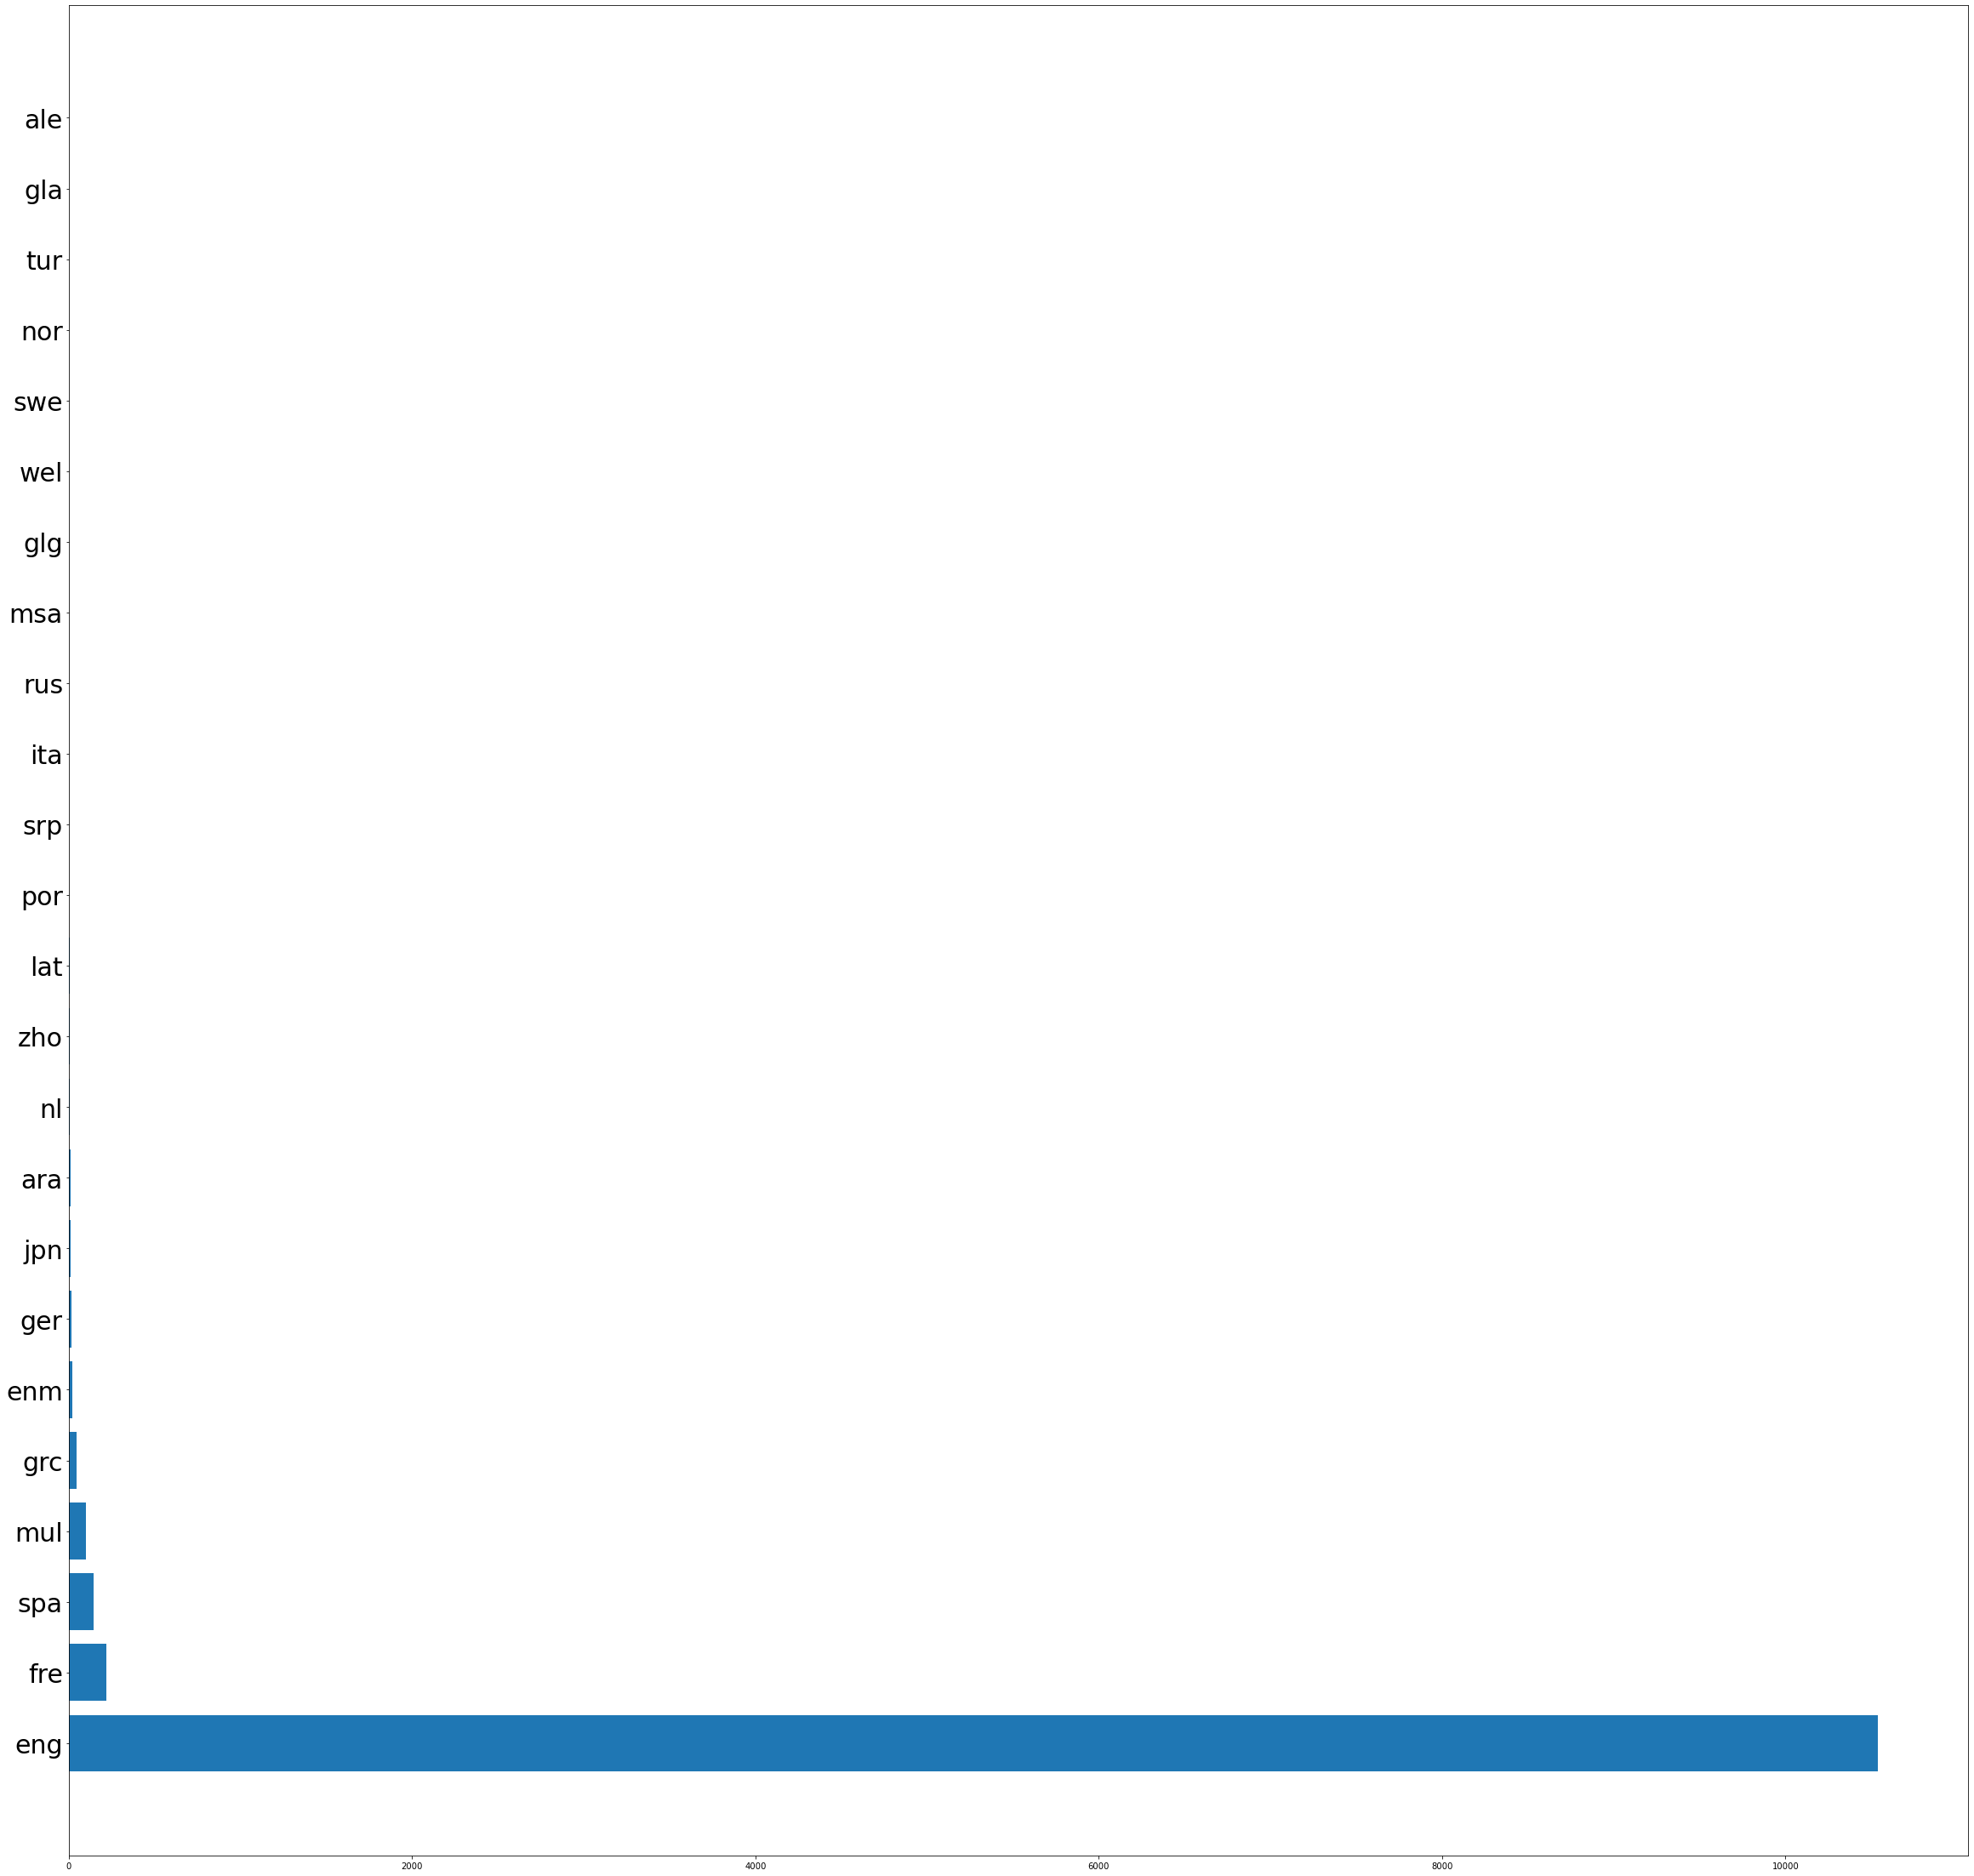

In [33]:
plt.figure(figsize=(40, 40))
plt.barh(range(len(lang)), width=sorted(list(lang.values()))[::-1], align='center')
plt.yticks(range(len(lang)), list(lang.keys()), fontsize=30)
plt.show();

## Observing Above graph
English is most dominating language,
but in the next bar graph Down below if
English is removed we see graph looks normal
and not totally dominant by a single language

In [34]:
del lang["eng"]

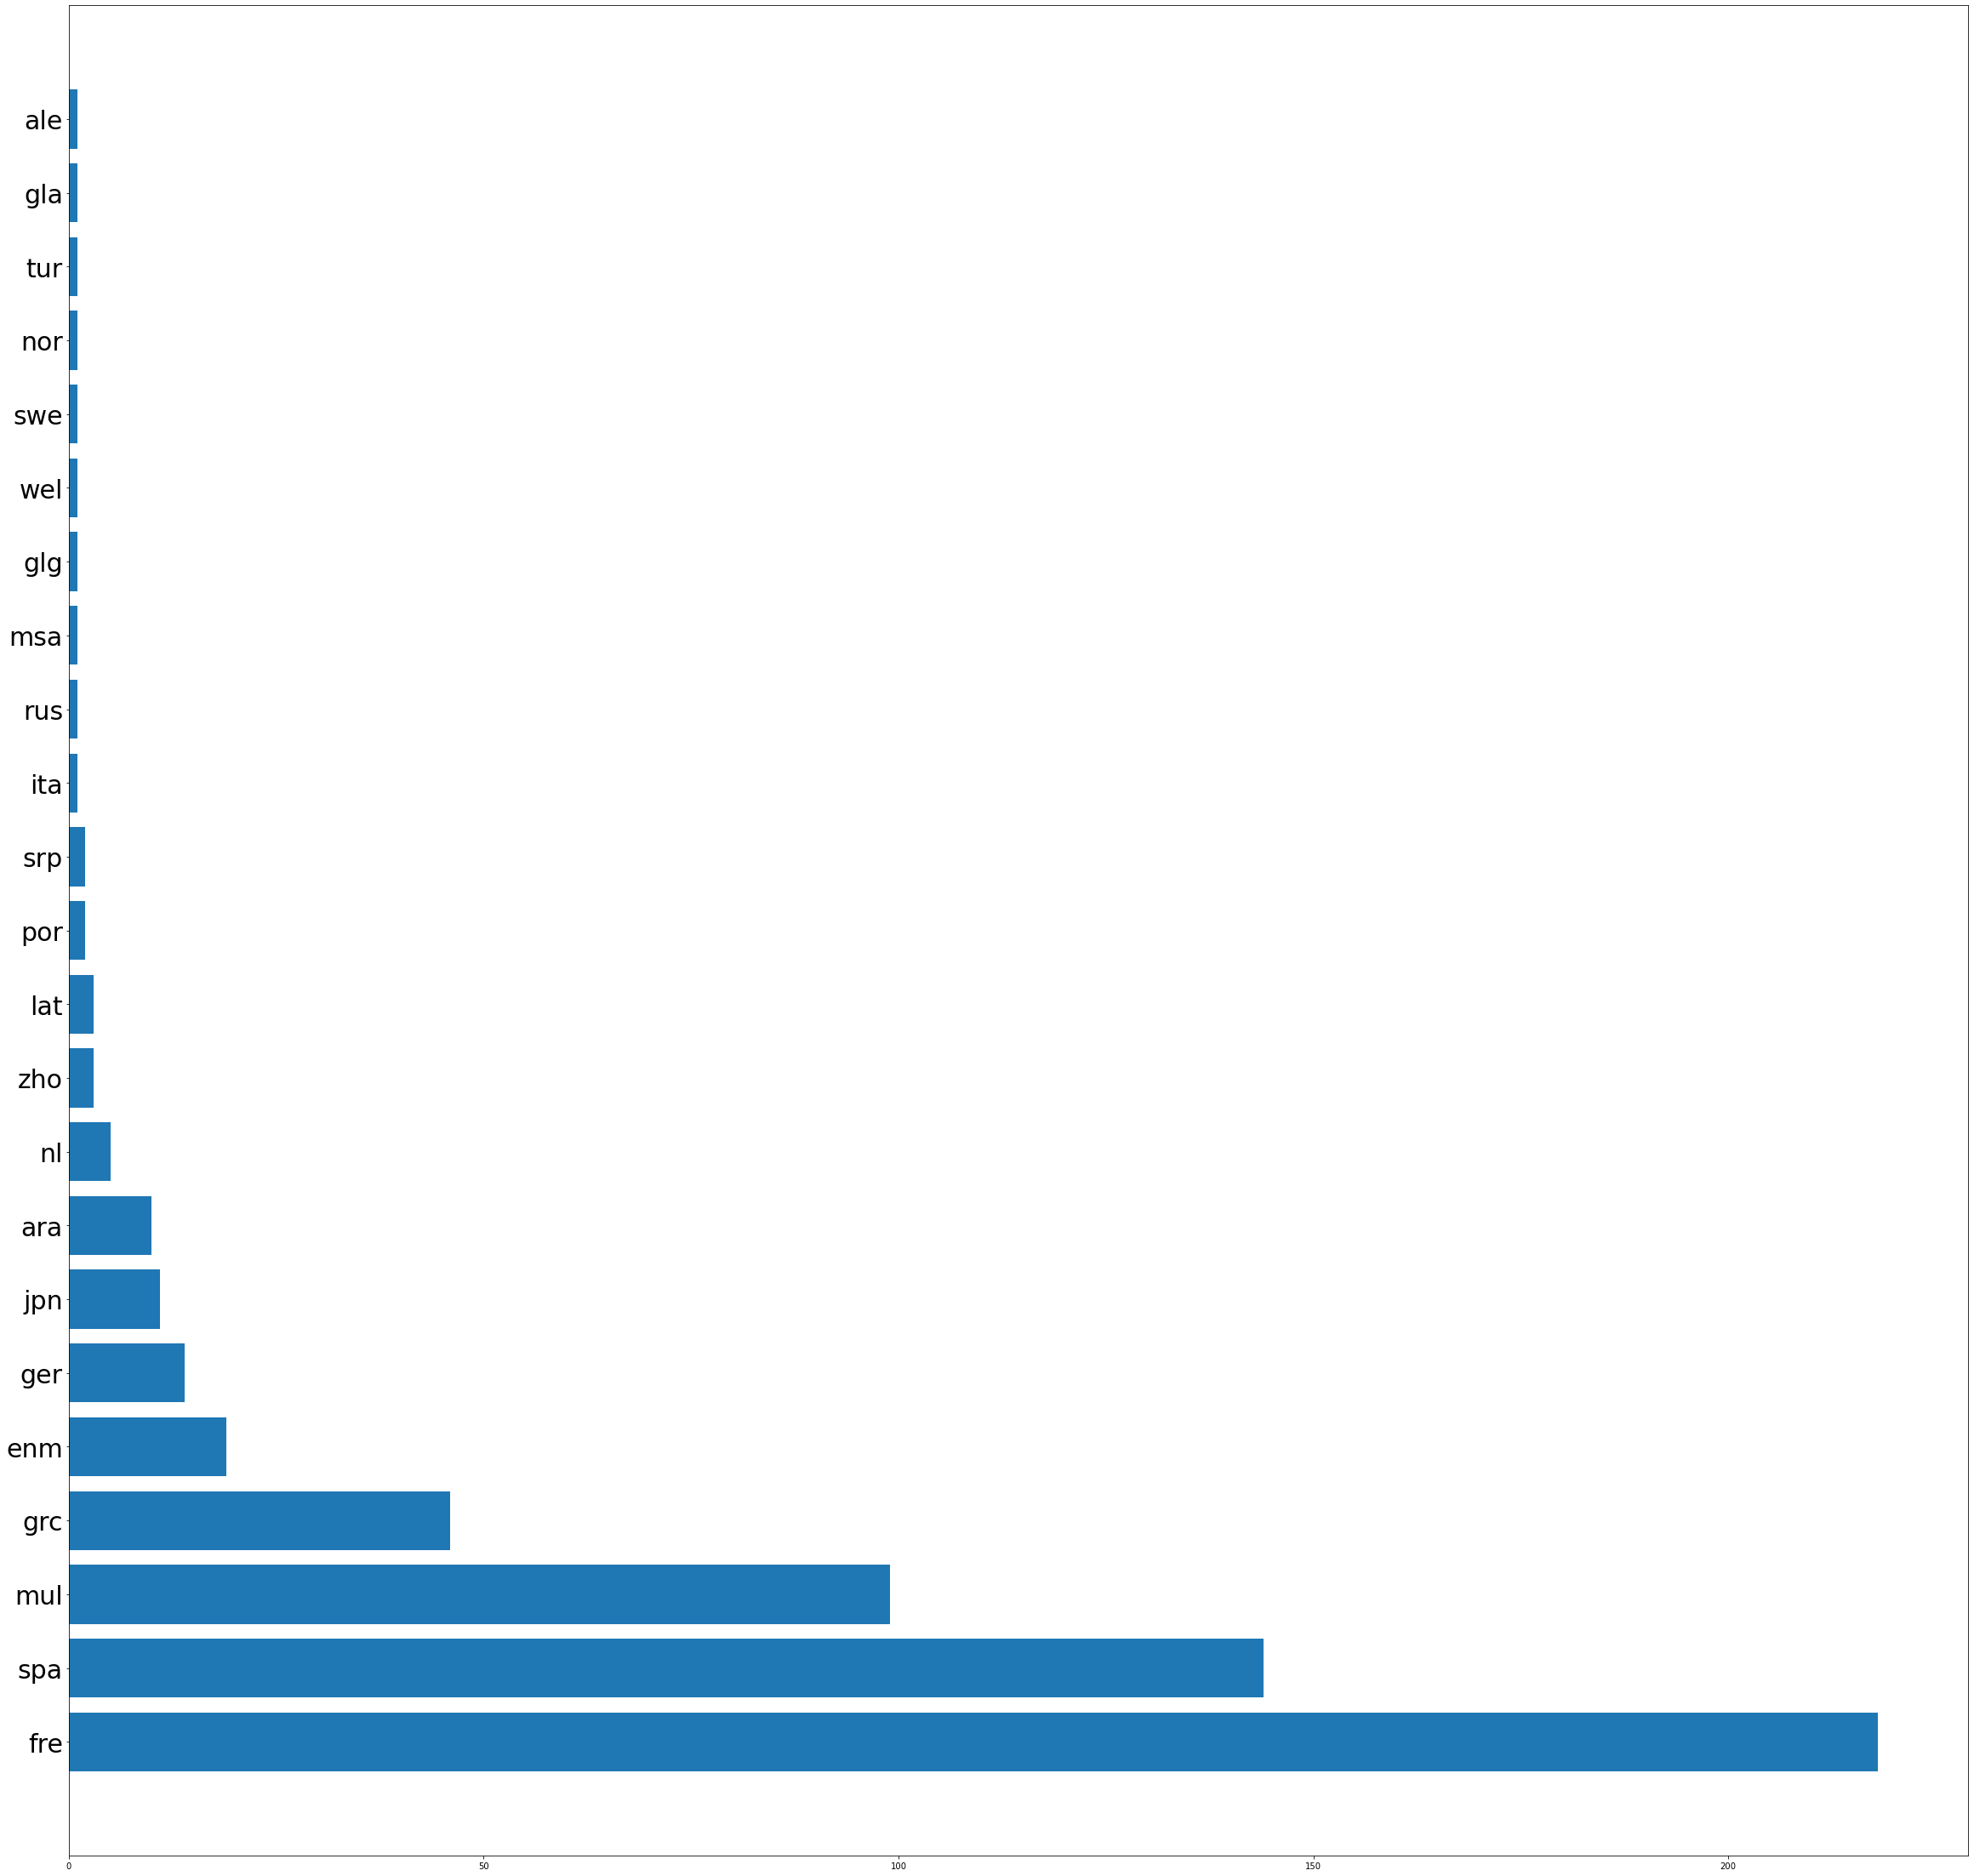

In [35]:
plt.figure(figsize=(40, 40))
plt.barh(range(len(lang)), width = sorted(list(lang.values()))[::-1], align='center')
plt.yticks(range(len(lang)), list(lang.keys()), fontsize=30)
plt.show();

In [36]:
rsv = rsv.set_index('bookID')

# Wrong dates
BookId
45531
31373

In [37]:
rsv = rsv.drop([45531, 31373])

In [38]:
l = rsv.publisher.value_counts()
l = l[l >= 20]

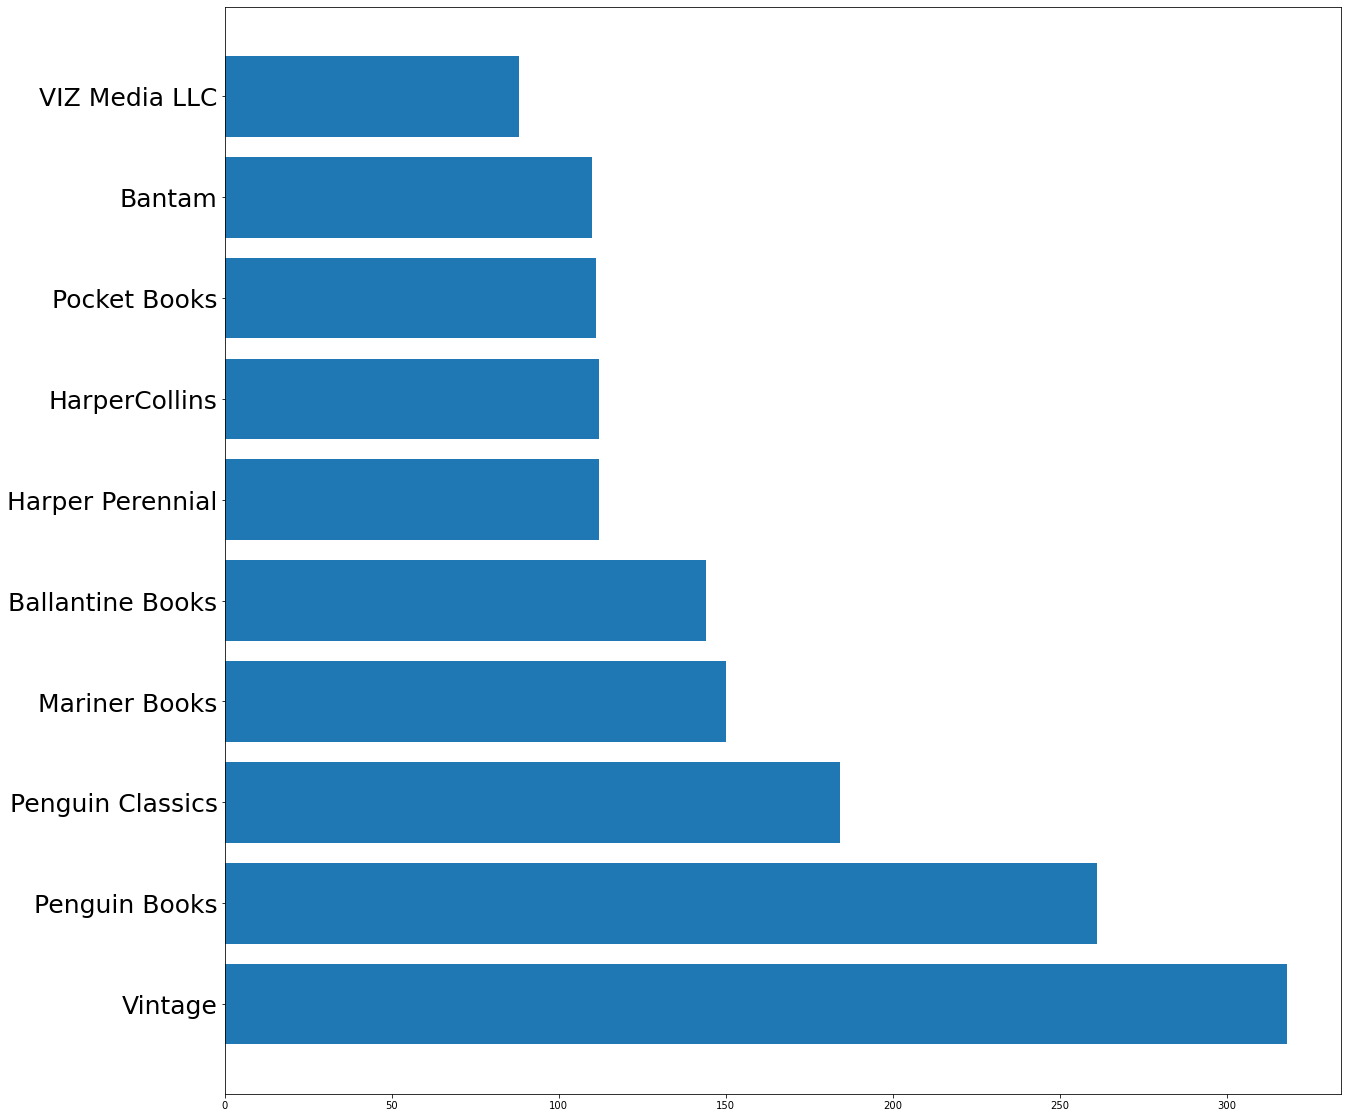

In [39]:
plt.figure(figsize=(20, 20))
plt.barh(range(10), width=l[:10])
plt.yticks(range(10), l.index.values[:10], fontsize= 25)
plt.show()

In [40]:
def calculate(word):
    return ord(word)

# Encoding
This function is for encoding Authors, This function was made after a lot of thought such that to have less than 5 % clashes

In [41]:
def encode(strs):
    if '/' in strs:
        final_sum = 0
        intr = strs.split('/')
        for s in intr:
            noramlize = len(s)
            summation = sum([calculate(x) for x in s])
            final_sum+=(summation/noramlize)
        return final_sum
    else:
        return sum([calculate(x) for x in strs])/len(strs)

In [42]:
rsv.insert(2,'Encoded authors', rsv.authors.apply(encode))

In [43]:
encode(rsv.authors.values[0])

188.8653846153846

# Encoding titles
This function was made to stand out with log and bias to length of the title,****Because**** as follows:->
* A title depends on it's length(talking syntaxically)
* And moreover it depends upon arrangement of words **such  as("a after p" or "p after a") are different things**.

In [44]:
def encode_title(tt):
    total = 0
    for w in tt.split(' '):
        if len(w) == 0:
            continue
        total+= sum([calculate(x)*math.log2(lg + len(w)) for lg,x in enumerate(w)])/ len(w)
    return total/len(tt)

In [45]:
l = []
for x in rsv.title.values:
    l.append(encode(x))

In [46]:
len(l), len(set(l))

(11121, 6794)

In [47]:
rsv.insert(1,'Encoded_titles',rsv.title.apply(encode_title)/rsv.average_rating.values)

In [48]:
rsv.head(2)

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,9.223224,J.K. Rowling/Mary GrandPré,188.865385,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006-09-16,"(4.0, 5.0]"
2,Harry Potter and the Order of the Phoenix (Har...,10.068398,J.K. Rowling/Mary GrandPré,188.865385,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004-09-01,"(4.0, 5.0]"
4,Harry Potter and the Chamber of Secrets (Harry...,9.922389,J.K. Rowling,84.250000,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003-11-01,"(4.0, 5.0]"
5,Harry Potter and the Prisoner of Azkaban (Harr...,9.564367,J.K. Rowling/Mary GrandPré,188.865385,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004-05-01,"(4.0, 5.0]"
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,8.636698,J.K. Rowling/Mary GrandPré,188.865385,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004-09-13,"(4.0, 5.0]"


# Constructing x
* For KMeans Clustering we need only numerical type data
* And for that we need to eliminate string or textual data

In [49]:
rsv.columns

Index(['title', 'Encoded_titles', 'authors', 'Encoded authors',
       'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'New dates', 'Rating_Interval'],
      dtype='object')

In [50]:
x = rsv[['Encoded_titles', 'Encoded authors', 'average_rating', '  num_pages','ratings_count','text_reviews_count', 'New dates']]

In [51]:
x

,Encoded_titles,Encoded authors,average_rating,num_pages,ratings_count,text_reviews_count,New dates
bookID,,,,,,,
1,9.223224,188.865385,4.57,652,2095690,27591,2006-09-16
2,10.068398,188.865385,4.49,870,2153167,29221,2004-09-01
4,9.922389,84.250000,4.42,352,6333,244,2003-11-01
5,9.564367,188.865385,4.56,435,2339585,36325,2004-05-01
8,8.636698,188.865385,4.78,2690,41428,164,2004-09-13
...,...,...,...,...,...,...,...
45631,10.048843,286.032749,4.06,512,156,20,2004-12-21
45633,12.022620,92.210526,4.08,635,783,56,1988-12-01
45634,9.939040,92.210526,3.96,415,820,95,1993-08-01


In [52]:
x['New dates'] = x['New dates'].astype(np.int64)

C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
x['New dates'].astype(np.float64)

bookID
1        1.158365e+18
2        1.093997e+18
4        1.067645e+18
5        1.083370e+18
8        1.095034e+18
             ...     
45631    1.103587e+18
45633    5.969376e+17
45634    7.441632e+17
45639    1.172534e+18
45641    1.148774e+18
Name: New dates, Length: 11121, dtype: float64

In [54]:
x = x.reset_index()

In [55]:
x = x.drop('bookID',axis=1)

# Date conversion

In [56]:
x['New dates'] = x['New dates'] //  10**12

# The dtypes
All of them are numeric

In [57]:
x.dtypes

Encoded_titles        float64
Encoded authors       float64
average_rating        float64
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
New dates               int64
dtype: object

In [58]:
x = x[x['New dates'] > 0]

# Adjusting
* Dates were < 0 in timestamp format
* The Encoded Titles had an infinity Thanks to [This guy](https://www.kaggle.com/carlosdg) for helping me.

In [59]:
x = x[x['Encoded_titles'] != np.inf]

In [60]:
x.corr().style.background_gradient(cmap='rainbow').set_precision(3)

,Encoded_titles,Encoded authors,average_rating,num_pages,ratings_count,text_reviews_count,New dates
Encoded_titles,1.000,0.551,0.072,-0.025,-0.010,-0.013,0.009
Encoded authors,0.551,1.000,0.067,-0.003,-0.008,-0.011,0.026
average_rating,0.072,0.067,1.000,0.164,0.041,0.034,-0.048
num_pages,-0.025,-0.003,0.164,1.000,0.034,0.037,-0.035
ratings_count,-0.010,-0.008,0.041,0.034,1.000,0.866,0.045
text_reviews_count,-0.013,-0.011,0.034,0.037,0.866,1.000,0.068
New dates,0.009,0.026,-0.048,-0.035,0.045,0.068,1.000


In [61]:
corr = x.corr()

In [62]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='rainbow', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,Encoded_titles,Encoded authors,average_rating,num_pages,ratings_count,text_reviews_count,New dates
Encoded_titles,nan,nan,nan,nan,nan,nan,nan
Encoded authors,0.55,nan,nan,nan,nan,nan,nan
average_rating,0.07,0.07,nan,nan,nan,nan,nan
num_pages,-0.02,-0.00,0.16,nan,nan,nan,nan
ratings_count,-0.01,-0.01,0.04,0.03,nan,nan,nan
text_reviews_count,-0.01,-0.01,0.03,0.04,0.87,nan,nan
New dates,0.01,0.03,-0.05,-0.04,0.04,0.07,nan


# Doing elbow method for n
* Looking for wcss which is optimal and hence obtain correct amount of categoires.
* **Weighted Cumlatice shared sum** is the formula which takes the weights of all the features in account
* This weight is minimized with optimum value by looking at an elbow(shape in graph)

In [63]:
wcss = [] 
for i in range(1,11):
    clusters = KMeans(n_clusters = i, random_state = 42) 
    clusters.fit(x.values)
    wcss.append(clusters.inertia_)

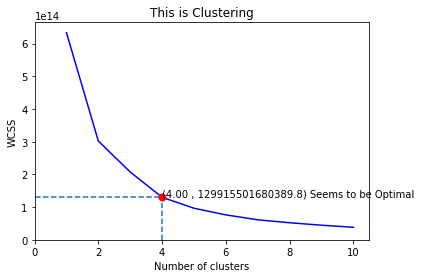

In [65]:
plt.plot(range(1,11),wcss,'b')
plt.title('This is Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(4,wcss[3],'.',mew = 4, ms =8,color = 'r')
plt.annotate(xy = [4,wcss[3]],text='(%.2f , %.1f) Seems to be Optimal'%(4,wcss[3]))
plt.vlines(4,0,wcss[3],linestyle='dashed')
plt.hlines(wcss[3],0,4,linestyle='dashed')
plt.xlim(0,None)
plt.ylim(0,None);
plt.show();

In [70]:
clusters = KMeans(n_clusters=4, random_state=42)

In [71]:
x['cluster'] = clusters.fit_predict(x)

In [72]:
x

,Encoded_titles,Encoded authors,average_rating,num_pages,ratings_count,text_reviews_count,New dates,cluster
0,9.223224,188.865385,4.57,652,2095690,27591,1158364,3
1,10.068398,188.865385,4.49,870,2153167,29221,1093996,3
2,9.922389,84.250000,4.42,352,6333,244,1067644,0
3,9.564367,188.865385,4.56,435,2339585,36325,1083369,3
4,8.636698,188.865385,4.78,2690,41428,164,1095033,0
...,...,...,...,...,...,...,...,...
11116,10.048843,286.032749,4.06,512,156,20,1103587,0
11117,12.022620,92.210526,4.08,635,783,56,596937,1
11118,9.939040,92.210526,3.96,415,820,95,744163,2
11119,13.944270,92.210526,3.72,434,769,139,1172534,0


In [73]:
corr = x.corr()

In [74]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='rainbow', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,Encoded_titles,Encoded authors,average_rating,num_pages,ratings_count,text_reviews_count,New dates,cluster
Encoded_titles,nan,nan,nan,nan,nan,nan,nan,nan
Encoded authors,0.55,nan,nan,nan,nan,nan,nan,nan
average_rating,0.07,0.07,nan,nan,nan,nan,nan,nan
num_pages,-0.02,-0.00,0.16,nan,nan,nan,nan,nan
ratings_count,-0.01,-0.01,0.04,0.03,nan,nan,nan,nan
text_reviews_count,-0.01,-0.01,0.03,0.04,0.87,nan,nan,nan
New dates,0.01,0.03,-0.05,-0.04,0.04,0.07,nan,nan
cluster,-0.01,-0.03,0.03,0.02,0.09,0.05,-0.59,nan


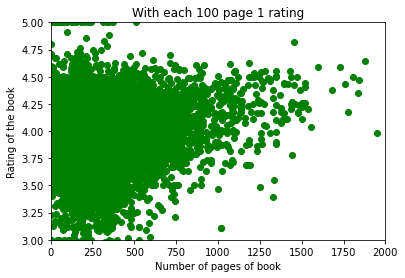

In [116]:
plt.scatter(x['  num_pages'],x['average_rating'], c='green')
plt.xlim(0,2000)
plt.xlabel('Number of pages of book')
plt.ylim(3,5)
plt.ylabel('Rating of the book')
plt.title('With each 100 page 1 rating')
plt.plot();

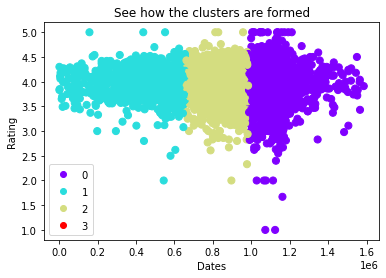

In [120]:
sct = plt.scatter(x['New dates'],x['average_rating'], 
            c = x['cluster'],s = 50, cmap='rainbow',)
plt.xlabel('Dates')
plt.ylabel('Rating')
plt.title('See how the clusters are formed')
plt.legend(*sct.legend_elements())
plt.plot();

# Suggestion Logic

## Find Mins
* The function finds 10 minimum from a threshold value
* and then get the indexes of them from dataframe
* So the encoded values from a text based entry is matched
* The logic bieng that the similiar texts are encoded equally

In [66]:
def find_mins(df, thresh):
    indexes = dict()
    for i in range(df.shape[0]):
        indexes[df.iloc[i,1]] = i
    one = []
    two = []
    for x,y in indexes.items():
        if x <= thresh:
            one.append(x)
        else:
            two.append(x)
    one = sorted(one, reverse=True)[:10]
    two = sorted(two)[:10]
    get_one = [df.iloc[indexes[val]] for val in one] 
    get_two = [df.iloc[indexes[val]] for val in two]
    print(get_one,get_two)
    see = pd.DataFrame((get_one + get_two))
    return see

## Find correct values
* This function tries to find the colums which have similiarty with Encoded titles
* Also if n is greater than the total space of the selected items it returns all selected
* Sorting with **number of Pages** so that we get most fat book

In [67]:
def find_inarr(df,n):
    lol = []
    for i in range(df.shape[0]):
        lol.append(rsv[rsv['Encoded_titles'] == df.iloc[i, 0]])
    lol = pd.concat(lol)
    if n > lol.shape[0]:
        n = lol.shape[0]
    return lol.sort_values(["  num_pages"], ascending=False).iloc[:n]

## Main Suggestion Function
**Before any of below a clustering is done already, so we do this within the same cluster**
* This function is the actual suggestion function
* It first finds the same author as the book passed
* IF yes, returns the minium **diff value** that is matematically the nearest point
* IF no, we construct a new dataframe for final according to above functions
* When these are parse the values are sorted with **Titles** **Rating** and **Date Published**
* And final is to returned according to number of pages

In [68]:
def suggest(df,n=1):
    selector = x[x['cluster'] == df.iloc[-1]]
#     print(selector)
    finals = selector[selector['Encoded authors'] == df['Encoded authors']]
    if finals.shape[0] == 1:
        finals = find_mins(selector, df['Encoded authors'])
    middle = finals - df
    suggest = middle.abs().sort_values(["Encoded_titles","average_rating","New dates"]).iloc[:-1,:]
    suggest = finals.loc[suggest.index]
#     print(suggest.iloc[:, 0])
    return find_inarr(suggest,n)

# Real

In [224]:
def custom_values(lst,n=1):
    if type(lst[0]) == str:
        lst[0] = encode_title(lst[0])/lst[2]
    if type(lst[1]) == str:
        lst[1] = encode(lst[1])
    df = pd.DataFrame([lst],columns=x.columns[:-1])
    df['cluster'] = clusters.predict(df)
    try:
        return suggest(df.iloc[0], n)
    except:
        selector = x[x['cluster'] == df.iloc[0][-1]]
        mid = (selector - df.iloc[0]).abs()
        mid = mid[mid['Encoded_titles'] < mid['Encoded_titles'].median()]
        mid = mid[mid['average_rating'] < mid['average_rating'].std()]
        mid = mid[mid['Encoded authors'] < mid['Encoded authors'].median()]
        mid = mid[mid['Encoded authors'] < mid['Encoded authors'].std()]
        mid = mid[mid['average_rating'] < mid['average_rating'].std()]
        return rsv.iloc[mid.sort_values(by=['Encoded_titles']).index]

In [143]:
rsv[rsv['Encoded_titles'] == x.iloc[1311,0]]

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
4683,Personal Injuries (Kindle County Legal Thrille...,10.660625,Scott Turow,100.181818,3.86,0446608602,9780446608602,eng,528,5163,179,12/1/2000,Warner Books (NY),2000-12-01,"(3.0, 4.0]"


# Suggested

In [110]:
suggest(x.iloc[1311], 2)

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
4682,The Laws Of Our Fathers (Kindle County Legal T...,11.577272,Scott Turow,100.181818,3.75,0446604402,9780446604406,eng,817,3655,162,9/1/1997,Grand Central Publishing,1997-09-01,"(3.0, 4.0]"
4035,The Burden of Proof (Kindle County Legal Thril...,10.646092,Scott Turow,100.181818,4.06,0446677124,9780446677127,eng,608,32337,272,12/1/2000,Grand Central Publishing,2000-12-01,"(4.0, 5.0]"


# Real

In [111]:
rsv[rsv['Encoded_titles'] == x.iloc[5,0]]

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",10.725249,W. Frederick Zimmerman,93.272727,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,2005-04-26,"(3.0, 4.0]"


# Suggested

In [112]:
suggest(x.iloc[5])

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
5486,Andrew Carnegie,11.109374,David Nasaw,93.272727,3.99,1594201048,9781594201042,eng,896,2580,205,10/24/2006,Penguin Press HC The,2006-10-24,"(3.0, 4.0]"


In [113]:
new_example = ["Go Tell the Bees That I Am Gone","Diana Gabaldon",4.54,674,12313,5312,1637694]

In [75]:
custom_values(new_example, 4)

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
32419,The Hannibal Lecter Trilogy,10.115679,Thomas Harris,92.928571,4.42,0434009059,9780434009053,eng,1222,808,29,11/3/2005,William Heinemann Ltd.,2005-11-03,"(4.0, 5.0]"
10965,A Breath of Snow and Ashes (Outlander #6),8.871242,Diana Gabaldon,92.928571,4.44,0385340397,9780385340397,eng,980,105950,3992,8/29/2006,Delta,2006-08-29,"(4.0, 5.0]"
10988,Drums of Autumn (Outlander #4),9.061859,Diana Gabaldon,92.928571,4.35,0385335989,9780385335980,eng,880,141771,5455,8/7/2001,Delta,2001-08-07,"(4.0, 5.0]"
10987,Voyager (Outlander #3),8.021452,Diana Gabaldon,92.928571,4.39,0385335997,9780385335997,eng,870,198818,8130,8/7/2001,Delta,2001-08-07,"(4.0, 5.0]"


In [76]:
from datetime import datetime

In [77]:
new_ex = ["House of Leaves","Mark Z. Danielewski", 4,709,151035,12826,952387]

In [78]:
custom_values(new_ex, 2)

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
24800,House of Leaves,12.015388,Mark Z. Danielewski,91.105263,4.10,038560310X,9780385603102,eng,705,97710,7357,3/7/2000,Random House,2000-03-07,"(4.0, 5.0]"
40153,The Whalestoe Letters,10.931044,Mark Z. Danielewski,91.105263,4.04,0375714413,9780375714412,eng,83,2112,96,10/10/2000,Pantheon,2000-10-10,"(4.0, 5.0]"


In [80]:
new_ex2 = ["Last Bus to Woodstock","Colin Dexter",3.87,256,14056,822,
          np.datetime64(datetime.strptime("10 January 1975","%d %B %Y")).astype(np.int64) // 10**9]

In [81]:
custom_values(new_ex2, 5)

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
30429,Fanta C (Loveswept #217),8.450976,Sandra Brown,96.083333,3.62,0553218360,9780553218367,eng,192,12,1,10/1/1987,Loveswept,1987-10-01,"(3.0, 4.0]"
2893,Love Artist (Harlequin Romance #2860),11.922979,Valerie Parv,96.083333,3.25,0373028601,9780373028603,eng,187,3,1,7/24/1987,Harlequin Romance,1987-07-24,"(3.0, 4.0]"
30392,Relentless Desire,11.629219,Sandra Brown,96.083333,3.63,0515068705,9780515068702,eng,183,22,4,12/31/1983,Jove Books,1983-12-31,"(3.0, 4.0]"


In [225]:
new_ex = ["Leviathan Falls","James S. A. Corey",4.51,560,549,36,
         np.datetime64(datetime.strptime("30 November 2021","%d %B %Y")).astype(np.int64) // 10**9]

In [226]:
custom_values(new_ex, 1)

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
15876,Harry Potter y la Orden del Fénix (Harry Potte...,9.833843,J.K. Rowling,84.250000,4.49,8478888845,9788478888849,spa,893,5637,458,2/21/2004,Emece Editores,2004-02-21,"(4.0, 5.0]"
2331,The Lord of the Rings- 3 volumes set (The Lord...,9.632719,J.R.R. Tolkien,81.000000,4.50,0618574999,9780618574995,en-US,1438,232,9,6/1/2005,Mariner Books,2005-06-01,"(4.0, 5.0]"
4256,Harry Potter and the Prisoner of Azkaban (Harr...,9.564367,J.K. Rowling,84.250000,4.56,074757362X,9780747573623,eng,480,3141,140,7/1/2008,Bloomsbury UK,2008-07-01,"(4.0, 5.0]"
41911,Harry Potter und der Gefangene von Askaban (Ha...,9.563522,J.K. Rowling,84.250000,4.56,355155210X,9783551552105,ger,448,30,2,4/1/2001,Carlsen,2001-04-01,"(4.0, 5.0]"
31,The Lord of the Rings (The Lord of the Rings ...,9.946304,J.R.R. Tolkien,81.000000,4.50,0618517650,9780618517657,eng,1184,1710,91,10/21/2004,Houghton Mifflin Harcourt,2004-10-21,"(4.0, 5.0]"
5898,The Lord of the Rings (The Lord of the Rings ...,9.946304,J.R.R. Tolkien,81.000000,4.50,0007136587,9780007136582,eng,1200,682,43,9/16/2002,Not Avail,2002-09-16,"(4.0, 5.0]"
15245,The Return of the King (The Lord of the Rings ...,10.062238,J.R.R. Tolkien,81.000000,4.53,0007171994,9780007171996,eng,554,265,5,11/6/2003,HarperCollins Publishers Ltd,2003-11-06,"(4.0, 5.0]"
15298,The Return of the King (The Lord of the Rings ...,10.062238,J.R.R. Tolkien,81.000000,4.53,0618574972,9780618574971,en-US,508,1635,74,6/1/2005,Mariner Books,2005-06-01,"(4.0, 5.0]"
43504,Harry Potter and the Philosopher's Stone (Harr...,9.297527,J.K. Rowling,84.250000,4.47,158234681X,9781582346816,gla,250,11,0,7/1/2010,Bloomsbury USA Childrens,2010-07-01,"(4.0, 5.0]"
